In [29]:
import utils
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
data_url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
data_dir = utils.download_data(data_url, "pizza_steak")
data_dir

[INFO] data/pizza_steak directory exists, skipping download.


PosixPath('data/pizza_steak')

In [31]:
utils.walk_through_dir(data_dir)

There are 250 images in 'data/pizza_steak/test/pizza'.
There are 250 images in 'data/pizza_steak/test/steak'.
There are 750 images in 'data/pizza_steak/train/pizza'.
There are 750 images in 'data/pizza_steak/train/steak'.


In [32]:
random_images = utils.get_random_images(num_images=3, data_path=data_dir)
random_images

array([PosixPath('data/pizza_steak/train/steak/3894222.jpg'),
       PosixPath('data/pizza_steak/test/steak/2716791.jpg'),
       PosixPath('data/pizza_steak/train/steak/1476404.jpg')],
      dtype=object)

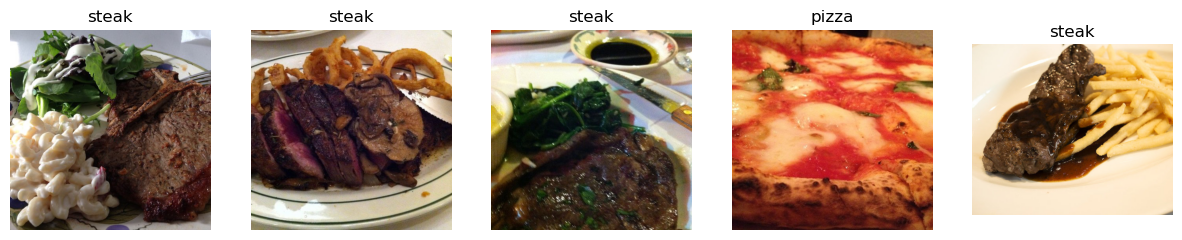

In [33]:
utils.plot_random_images(num_images=5, data_path=data_dir)

In [34]:
import data_setup

train_dir = data_dir/"train"
test_dir = data_dir/"test"

train_datasets, test_datasets = data_setup.create_datasets(
    train_dir = train_dir, 
    test_dir = test_dir)
train_datasets, test_datasets

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


(<keras.preprocessing.image.DirectoryIterator at 0x7f99140af850>,
 <keras.preprocessing.image.DirectoryIterator at 0x7f99140af910>)

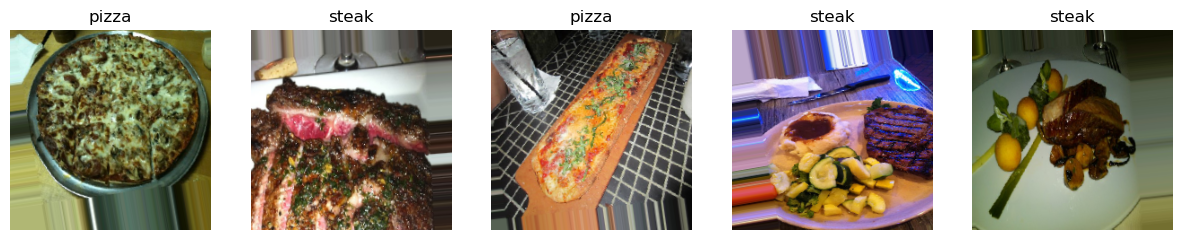

In [35]:
utils.plot_random_augmented_image(num_images=5, 
                                  datasets=train_datasets)

In [36]:
import model_builder

model1 = model_builder.create_tiny_vgg(input_shape=(224, 224, 3),
                                       hidden_units=10,
                                       out_features=2)
model1.summary()
                                       

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

2022-12-21 16:08:01.685166: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
model1
